In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()


Saving temperature_dataset.csv to temperature_dataset.csv


In [3]:
temperature_dataset = pd.read_csv('temperature_dataset.csv')
temperature_dataset = temperature_dataset.drop("dt", axis='columns')

In [4]:
label_encoders = {}
for column in ['LandAverageTemperature', 'LandAverageTemperatureUncertainty']:
    le = LabelEncoder()
    temperature_dataset[column] = le.fit_transform(temperature_dataset[column])
    label_encoders[column] = le

In [5]:
X = temperature_dataset.drop('LandAverageTemperatureUncertainty', axis=1)
y = temperature_dataset['LandAverageTemperatureUncertainty']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [7]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.00


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          38       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       0.0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


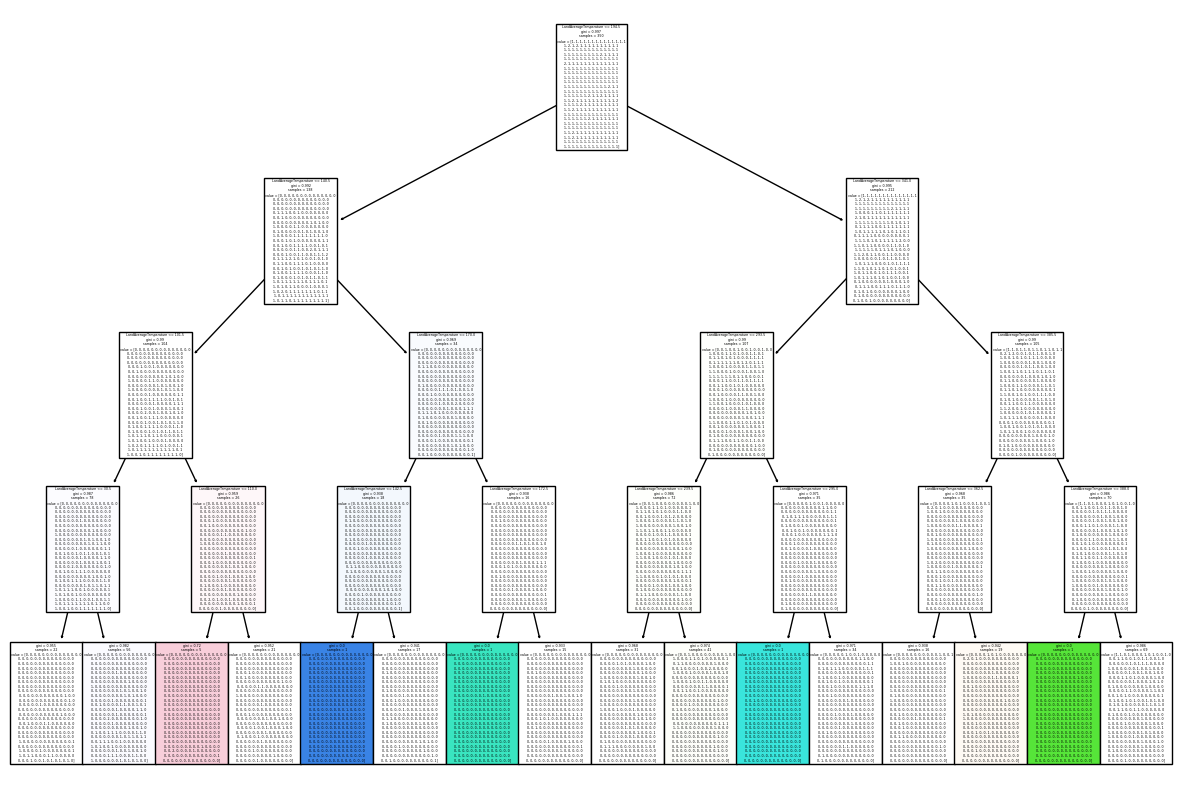

In [12]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()